#                        The spark foundation rotational internship program
                        Name - Jadhav Pratik Nandkshor
                        Linkdin Profile -https://www.linkedin.com/in/pratik-jadhav-a0b6a0160/
                        Batch  - August2021
                        Task 2 - Prediction Using Dicision Tree Algorithm and Visualize it Graphically

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [2]:
iris = pd.read_csv("Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
iris.shape

(150, 6)

In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

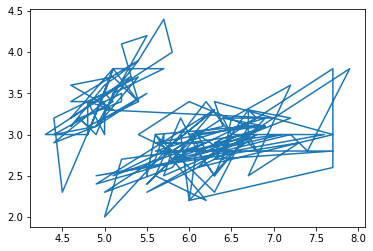

In [6]:
plt.plot(iris['SepalLengthCm'],iris['SepalWidthCm'])

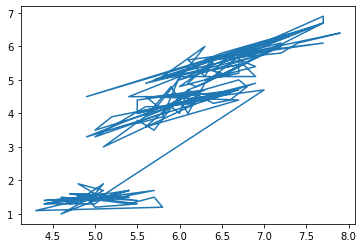

In [7]:
plt.plot(iris['SepalLengthCm'],iris['PetalLengthCm'])

In [8]:
X = iris.drop('Species', axis=1) #input columns
y = iris.Species #target column

In [9]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
label = LabelEncoder()
label

LabelEncoder()

In [11]:
y = label.fit_transform(y)

In [12]:
X,y

(      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0      1            5.1           3.5            1.4           0.2
 1      2            4.9           3.0            1.4           0.2
 2      3            4.7           3.2            1.3           0.2
 3      4            4.6           3.1            1.5           0.2
 4      5            5.0           3.6            1.4           0.2
 ..   ...            ...           ...            ...           ...
 145  146            6.7           3.0            5.2           2.3
 146  147            6.3           2.5            5.0           1.9
 147  148            6.5           3.0            5.2           2.0
 148  149            6.2           3.4            5.4           2.3
 149  150            5.9           3.0            5.1           1.8
 
 [150 rows x 5 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (120, 5)
y_train (120,)
x_test (30, 5)
y_test (30,)


In [38]:
scaled=StandardScaler()

con_cols=[col for col in x_train.columns if x_train[col].dtype=='int64' or x_train[col].dtype=='float64']
for col in con_cols:
    x_train[col]=scaled.fit_transform(np.array(x_train[col]).reshape(-1,1))
    x_test[col]=scaled.transform(np.array(x_test[col]).reshape(-1,1))
print(x_train.head())
print('******************************************************************************')
print('X_test')
print(x_test.head())
 

          Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
22 -1.210307      -1.473937      1.220379      -1.563987     -1.309484
15 -1.372402      -0.133071      3.020017      -1.277280     -1.042922
65 -0.214583       1.085898      0.095606       0.385621      0.289886
11 -1.465027      -1.230143      0.770470      -1.219939     -1.309484
42 -0.747179      -1.717731      0.320560      -1.391963     -1.309484
******************************************************************************
X_test
           Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
73  -0.029331       0.354517     -0.579258       0.557645      0.023324
18  -1.302933      -0.133071      1.670289      -1.162597     -1.176203
118  1.012706       2.304867     -1.029168       1.819157      1.489413
78   0.086451       0.232620     -0.354304       0.442962      0.423166
76   0.040138       1.207795     -0.579258       0.614987      0.289886


In [39]:
model = DecisionTreeClassifier()

In [70]:
clf=model.fit(x_train,y_train)
clf

DecisionTreeClassifier()

In [43]:
prediction=model.predict(x_test)
prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [52]:
comparison=pd.DataFrame({"actual":y_test,'predicted':prediction})
comparison

,actual,predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [57]:
print("train score::",model.score(x_train,y_train))
print('test score::',model.score(x_test,y_test))

train score:: 1.0
test score:: 1.0


In [61]:
print(confusion_matrix(y_test,prediction))
print('####################################')
print(classification_report(y_test,prediction))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
####################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

